# Tarea Semanal 15

#### Por Joaquín López Tramullas
---------------------------------------------------------------

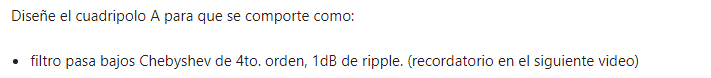

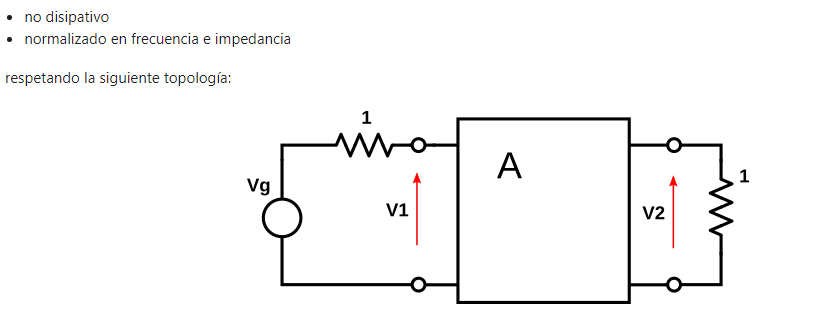

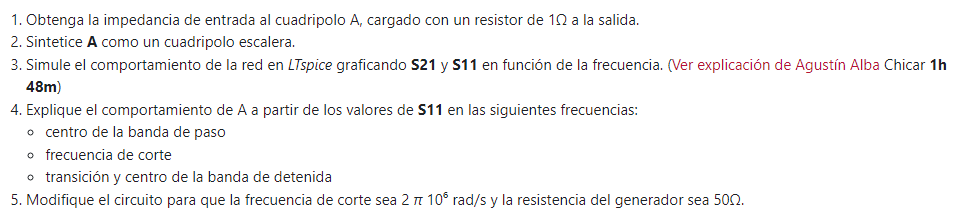

-0.375109721637708*(1.18389149689641e-15*s - 1.0)


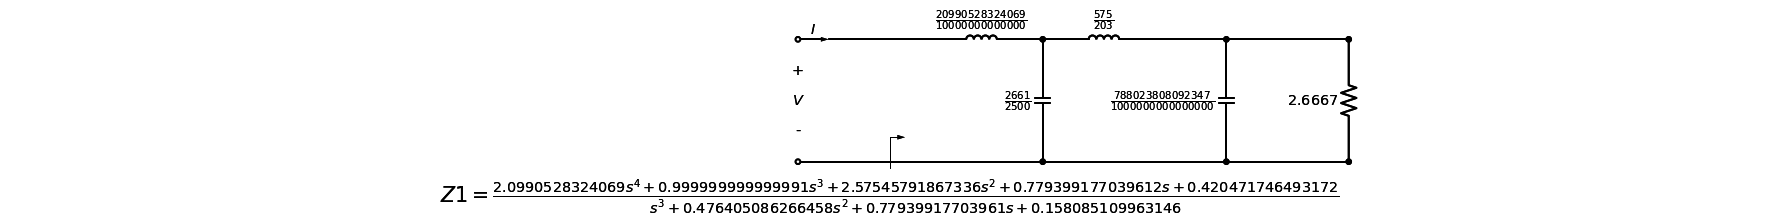

In [74]:
import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor, Capacitor, Inductor
import numpy as np

s = sp.symbols('s ', complex=True)

a = 2.099052832406901
b = 0.999999999999991
c = 2.575457918673359
d = 0.779399177039612
e = 0.420471746493172
f = 0.476405086266458
g = 0.779399177039610
h = 0.158085109963146

# Sea la siguiente función de excitación
Z1 = (a * s**4 + b * s**3 + c * s**2 + d * s + e)/(s**3 + f * s**2 + g * s + h)

# Aplico remociones

Z2, Z_rem1 = tc2.remover_polo_infinito(Z1)

# Redondeo los coeficientes del polinomio a 5 decimales despues de la coma
# ya que sino la remoción no va a ser del todo correcta (quedan numeros que
# tienden a 0 pero que no son 0 exacatamente ---> los convierto en 0)
for a in sp.preorder_traversal(Z2):
    if isinstance(a, sp.Float):
        Z2 = Z2.subs(a, round(a, 5))
    
Y2 = 1/Z2

Y4, Y_rem2 = tc2.remover_polo_infinito(Y2)

for a in sp.preorder_traversal(Y4):
    if isinstance(a, sp.Float):
        Y4 = Y4.subs(a, round(a, 3))
        
Z4 = 1/Y4

Z6, Z_rem4 = tc2.remover_polo_infinito(Z4)

for a in sp.preorder_traversal(Z6):
    if isinstance(a, sp.Float):
        Z6 = Z6.subs(a, round(a, 3))

Y6 = 1/Z6

Y8, Y_rem6 = tc2.remover_polo_infinito(Y6)

print(Y8)
       
for a in sp.preorder_traversal(Y8):
    if isinstance(a, sp.Float):
        Y8 = Y8.subs(a,round(a, 3))
    
Z8 = 1/Y8


# Calculo componentes
L1 = Z_rem1/s
C1 = Y_rem2/s
L2 = Z_rem4/s
C2 = Y_rem6/s
RL = str(2.6667)    # Forcé el valor porque no me anda bien el redondeo de Y8

# Dibujamos la red resultante
d = Drawing(unit=4)

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Z1',  
                                          Z1, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)


d = tc2.dibujar_elemento_serie(d, Inductor, L1)
d = tc2.dibujar_elemento_derivacion(d, Capacitor, C1)
d = tc2.dibujar_elemento_serie(d, Inductor, L2)
d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_elemento_derivacion(d, Capacitor, C2)
d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_elemento_derivacion(d, Resistor, RL)
display(d)


#### Circuito normalizado:

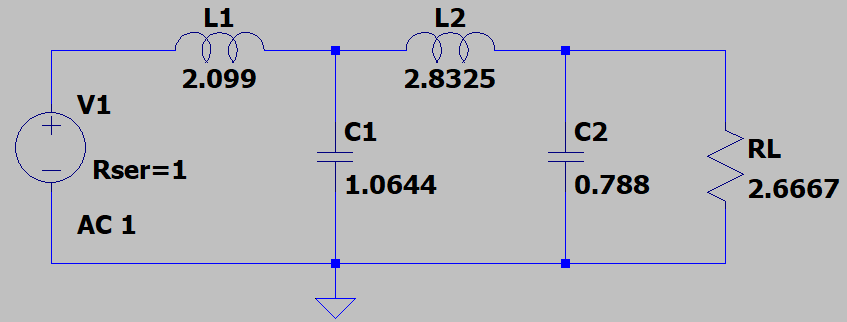

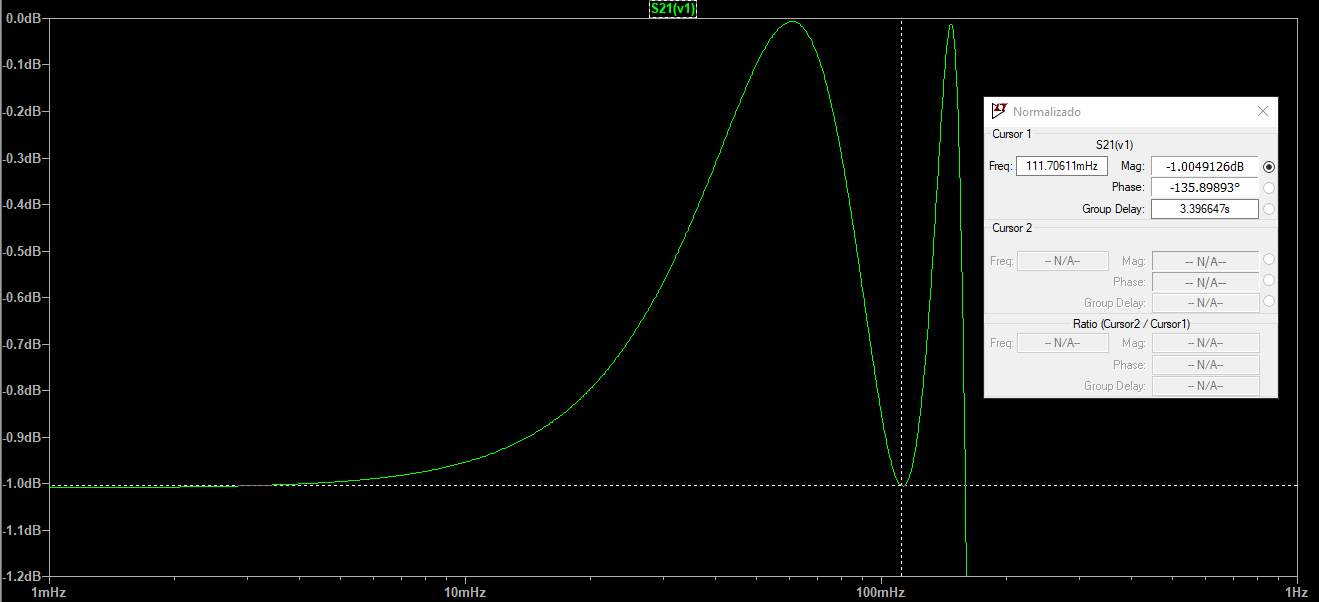

Se observa como el ripple máximo en la banda de paso es de 1dB. Al ser un Chebyshev de 4to orden se aprecian los 4 "toques". 

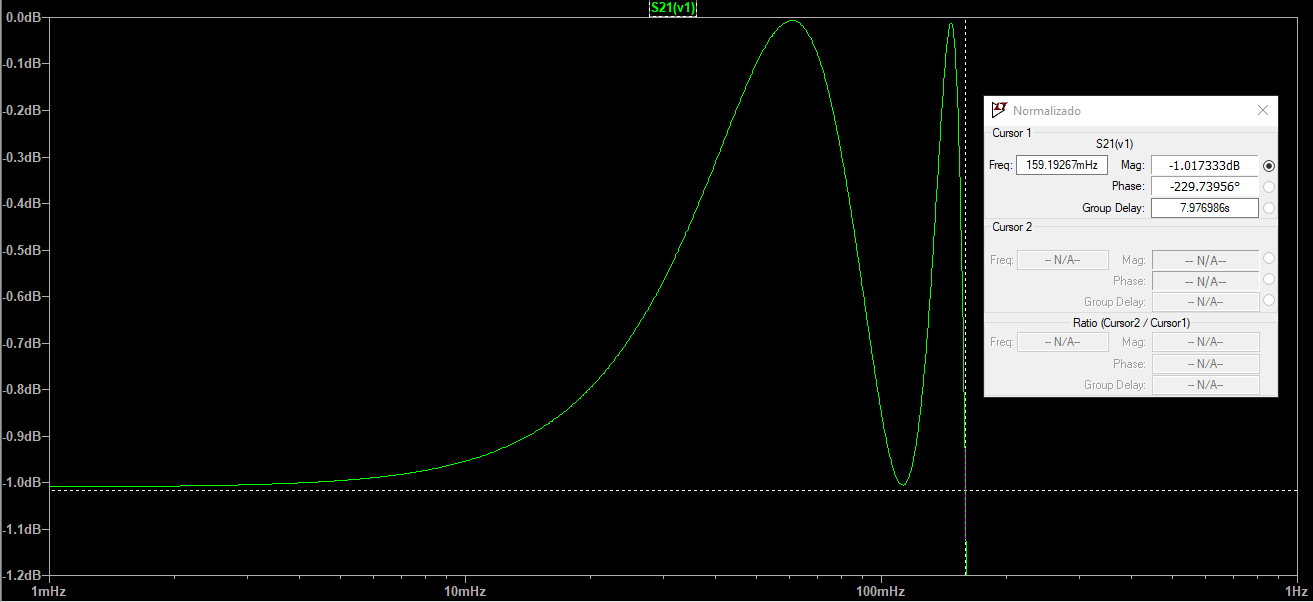

Vemos también, que en la frecuencia de corte w = 1 (f = 159mHZ) tenemos exactamente -1dB.

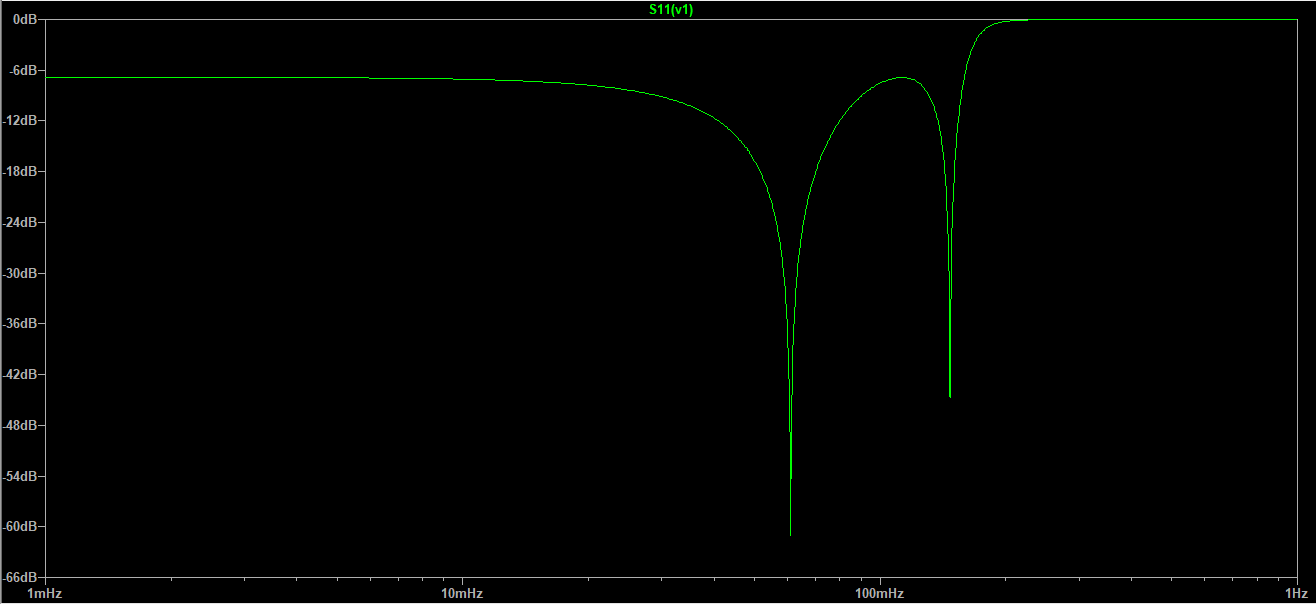

Analizando s11, vemos que hay 2 picos negativos, en los cuales s11 tiende a 0. En estos momentos, nada se refleja en el puerto de entrada, por lo cual toda la potencia es transmitida a la carga (ya que el puerto de saldia está adaptado).

Al superar los 200Hz aproximadamente, s11 vale 1 (0dB), por lo cual toda la potencia se refleja en el puerto de entrada y no llega nada a la carga.

Finalmente, vemos que en la mayor parte de la banda de paso s11 tiene un valor de -7dB (0.2 veces). Teniendo en cuenta que |s11|^2 es la potencia que se refleja en la entrada, podemos decir que se está transmitiendo un 96% de la potencia a la carga.

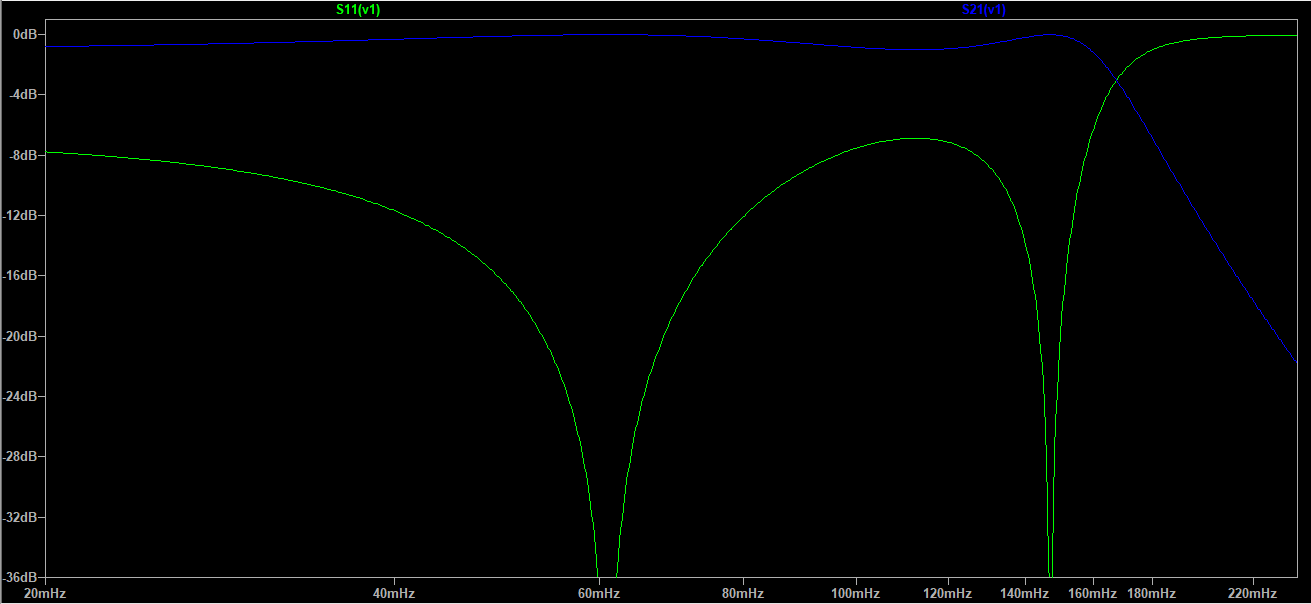

Se observa que cuando s21 toca los 0dBs, es cuando s11 tiende a 0, momento de máxima transferencia de potencia.

#### Circuito normalizado:

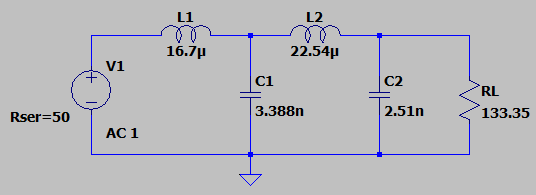

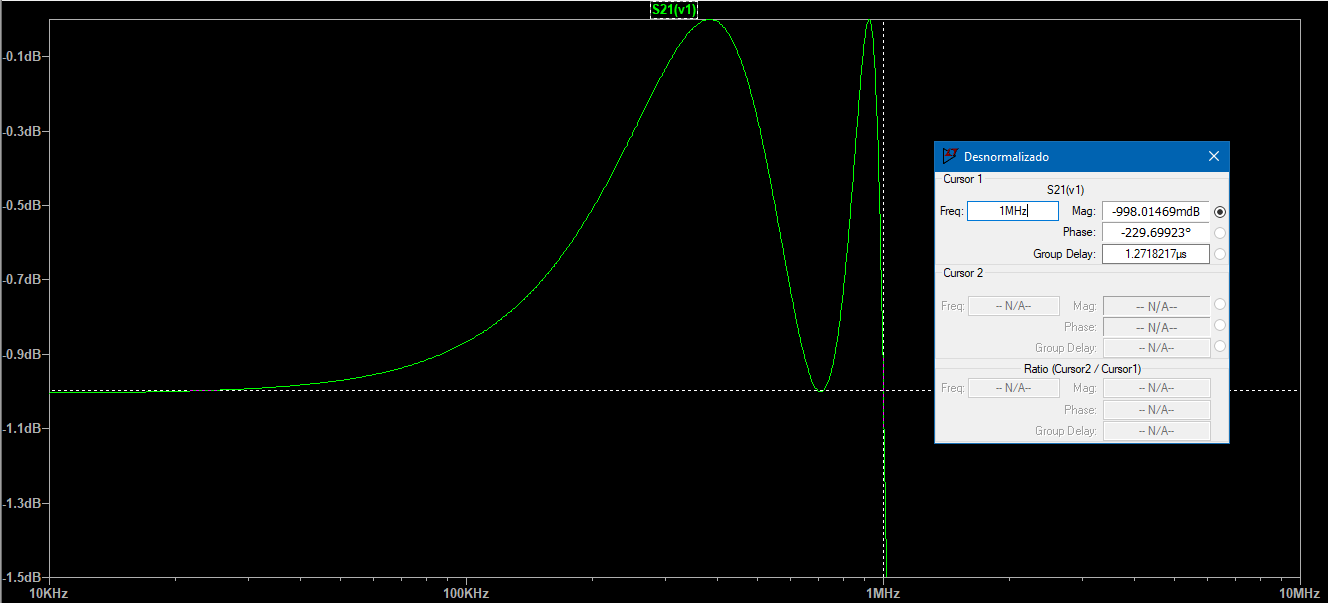

Vemos que al desnormalizar el circuito, la frecuencia de corte pasa a estar en 1MHz.

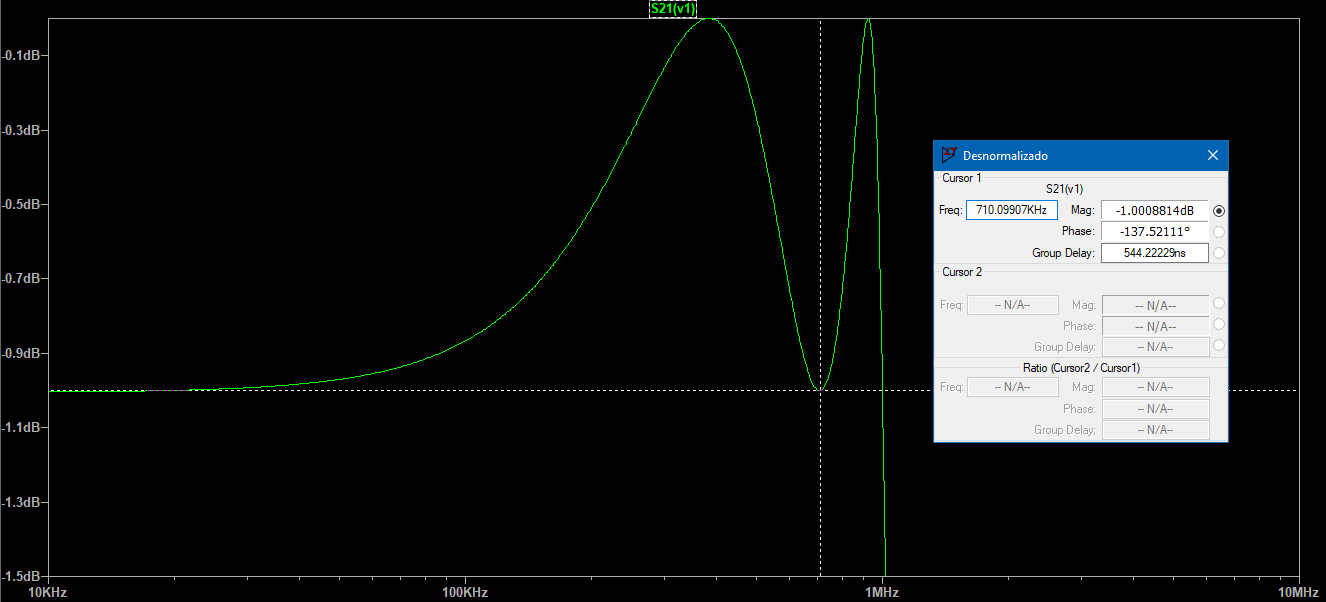

El ripple máximo en la banda de paso sigue siendo de 1dB.